##### Copyright 2020 The TensorFlow Authors.

In [2]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Simple audio recognition: Recognizing keywords

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/audio/simple_audio">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/audio/simple_audio.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/audio/simple_audio.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/audio/simple_audio.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This tutorial demonstrates how to preprocess audio files in the WAV format and build and train a basic <a href="https://en.wikipedia.org/wiki/Speech_recognition" class="external">automatic speech recognition</a> (ASR) model for recognizing ten different words. You will use a portion of the [Speech Commands dataset](https://www.tensorflow.org/datasets/catalog/speech_commands) (<a href="https://arxiv.org/abs/1804.03209" class="external">Warden, 2018</a>), which contains short (one-second or less) audio clips of commands, such as "down", "go", "left", "no", "right", "stop", "up" and "yes".

Real-world speech and audio recognition <a href="https://ai.googleblog.com/search/label/Speech%20Recognition" class="external">systems</a> are complex. But, like [image classification with the MNIST dataset](../quickstart/beginner.ipynb), this tutorial should give you a basic understanding of the techniques involved.

## Setup

Import necessary modules and dependencies. Note that you'll be using <a href="https://seaborn.pydata.org/" class="external">seaborn</a> for visualization in this tutorial.

In [3]:
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display

# Set the seed value for experiment reproducibility.
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

print("Bibliothèques Python chargées")

Bibliothèques Python chargées


## Import the mini Speech Commands dataset

To save time with data loading, you will be working with a smaller version of the Speech Commands dataset. The [original dataset](https://www.tensorflow.org/datasets/catalog/speech_commands) consists of over 105,000 audio files in the <a href="https://www.aelius.com/njh/wavemetatools/doc/riffmci.pdf" class="external">WAV (Waveform) audio file format</a> of people saying 35 different words. This data was collected by Google and released under a CC BY license.

Download and extract the `mini_speech_commands.zip` file containing the smaller Speech Commands datasets with `tf.keras.utils.get_file`:

In [4]:
# DATASET_PATH = 'data/mini_speech_commands'

# data_dir = pathlib.Path(DATASET_PATH)
# if not data_dir.exists():
#   tf.keras.utils.get_file(
#       'mini_speech_commands.zip',
#       origin="http://storage.googleapis.com/download.tensorflow.org/data/mini_speech_commands.zip",
#       extract=True,
#       cache_dir='.', cache_subdir='data')

In [5]:
!mkdir data
!mkdir data/sons_oiseaux
data_path = 'data/sons_oiseaux'
data_dir = pathlib.Path(data_path)


The dataset's audio clips are stored in eight folders corresponding to each speech command: `no`, `yes`, `down`, `go`, `left`, `up`, `right`, and `stop`:

In [8]:
!unzip "bruant_chanteur.zip" -d "data/sons_oiseaux/"

Archive:  bruant_chanteur.zip
   creating: data/sons_oiseaux/bruant_chanteur/
  inflating: data/sons_oiseaux/bruant_chanteur/XC125704.wav  
  inflating: data/sons_oiseaux/bruant_chanteur/XC125706.wav  
  inflating: data/sons_oiseaux/bruant_chanteur/XC125711.wav  
  inflating: data/sons_oiseaux/bruant_chanteur/XC137603.wav  
  inflating: data/sons_oiseaux/bruant_chanteur/XC137812.wav  
  inflating: data/sons_oiseaux/bruant_chanteur/XC141828.wav  
  inflating: data/sons_oiseaux/bruant_chanteur/XC142117.wav  
  inflating: data/sons_oiseaux/bruant_chanteur/XC152505.wav  
  inflating: data/sons_oiseaux/bruant_chanteur/XC153382.wav  
  inflating: data/sons_oiseaux/bruant_chanteur/XC156283.wav  
  inflating: data/sons_oiseaux/bruant_chanteur/XC16923.wav  
  inflating: data/sons_oiseaux/bruant_chanteur/XC17143.wav  
  inflating: data/sons_oiseaux/bruant_chanteur/XC175509.wav  
  inflating: data/sons_oiseaux/bruant_chanteur/XC177095.wav  
  inflating: data/sons_oiseaux/bruant_chanteur/XC178318.

In [9]:
!unzip "bruant_a_gorge_blanche.zip" -d "data/sons_oiseaux/"

Archive:  bruant_a_gorge_blanche.zip
   creating: data/sons_oiseaux/bruant_a_gorge_blanche/
  inflating: data/sons_oiseaux/bruant_a_gorge_blanche/XC134281.wav  
  inflating: data/sons_oiseaux/bruant_a_gorge_blanche/XC138634.wav  
  inflating: data/sons_oiseaux/bruant_a_gorge_blanche/XC141419.wav  
  inflating: data/sons_oiseaux/bruant_a_gorge_blanche/XC149193.wav  
  inflating: data/sons_oiseaux/bruant_a_gorge_blanche/XC149194.wav  
  inflating: data/sons_oiseaux/bruant_a_gorge_blanche/XC149196.wav  
  inflating: data/sons_oiseaux/bruant_a_gorge_blanche/XC151288.wav  
  inflating: data/sons_oiseaux/bruant_a_gorge_blanche/XC154441.wav  
  inflating: data/sons_oiseaux/bruant_a_gorge_blanche/XC16937.wav  
  inflating: data/sons_oiseaux/bruant_a_gorge_blanche/XC177726.wav  
  inflating: data/sons_oiseaux/bruant_a_gorge_blanche/XC188418.wav  
  inflating: data/sons_oiseaux/bruant_a_gorge_blanche/XC188449.wav  
  inflating: data/sons_oiseaux/bruant_a_gorge_blanche/XC199344.wav  
  inflating:

In [10]:
!unzip "bruant_des_pres.zip" -d "data/sons_oiseaux/"

Archive:  bruant_des_pres.zip
   creating: data/sons_oiseaux/bruant_des_pres/
  inflating: data/sons_oiseaux/bruant_des_pres/XC151286.wav  
  inflating: data/sons_oiseaux/bruant_des_pres/XC154573.wav  
  inflating: data/sons_oiseaux/bruant_des_pres/XC154798.wav  
  inflating: data/sons_oiseaux/bruant_des_pres/XC16926.wav  
  inflating: data/sons_oiseaux/bruant_des_pres/XC17092.wav  
  inflating: data/sons_oiseaux/bruant_des_pres/XC172795.wav  
  inflating: data/sons_oiseaux/bruant_des_pres/XC172796.wav  
  inflating: data/sons_oiseaux/bruant_des_pres/XC174072.wav  
  inflating: data/sons_oiseaux/bruant_des_pres/XC174077.wav  
  inflating: data/sons_oiseaux/bruant_des_pres/XC174085.wav  
  inflating: data/sons_oiseaux/bruant_des_pres/XC177476.wav  
  inflating: data/sons_oiseaux/bruant_des_pres/XC185582.wav  
  inflating: data/sons_oiseaux/bruant_des_pres/XC185583.wav  
  inflating: data/sons_oiseaux/bruant_des_pres/XC188640.wav  
  inflating: data/sons_oiseaux/bruant_des_pres/XC194294.

In [14]:
chants = np.array(tf.io.gfile.listdir(str(data_dir)))
chants = chants[chants != '.ipynb_checkpoints']
print('Chants:', chants)

Chants: ['bruant_a_gorge_blanche' 'bruant_chanteur' 'bruant_des_pres']


Extract the audio clips into a list called `filenames`, and shuffle it:

In [15]:
filenames = tf.io.gfile.glob(str(data_dir) + '/*/*')
filenames = tf.random.shuffle(filenames)
filenames = tf.random.shuffle(filenames)
num_samples = len(filenames)
print('Number of total examples:', num_samples)
print('Number of examples per label:',
      len(tf.io.gfile.listdir(str(data_dir/chants[0]))))
print('Example file tensor:', filenames[0])

Number of total examples: 180
Number of examples per label: 60
Example file tensor: tf.Tensor(b'data/sons_oiseaux/bruant_chanteur/XC125704.wav', shape=(), dtype=string)


Split `filenames` into training, validation and test sets using a 80:10:10 ratio, respectively:

In [16]:
train_files = filenames[:144]
val_files = filenames[144: 144 + 18]
test_files = filenames[-18:]

print('Training set size', len(train_files))
print('Validation set size', len(val_files))
print('Test set size', len(test_files))

Training set size 144
Validation set size 18
Test set size 18


In [17]:
print(train_files[:5])
print(val_files[:5])
print(test_files[:5])


tf.Tensor(
[b'data/sons_oiseaux/bruant_chanteur/XC125704.wav'
 b'data/sons_oiseaux/bruant_des_pres/XC312748.wav'
 b'data/sons_oiseaux/bruant_des_pres/XC177476.wav'
 b'data/sons_oiseaux/bruant_a_gorge_blanche/XC418843.wav'
 b'data/sons_oiseaux/bruant_chanteur/XC488152.wav'], shape=(5,), dtype=string)
tf.Tensor(
[b'data/sons_oiseaux/bruant_des_pres/XC172795.wav'
 b'data/sons_oiseaux/bruant_des_pres/XC482702.wav'
 b'data/sons_oiseaux/bruant_chanteur/XC283691.wav'
 b'data/sons_oiseaux/bruant_chanteur/XC202204.wav'
 b'data/sons_oiseaux/bruant_a_gorge_blanche/XC149194.wav'], shape=(5,), dtype=string)
tf.Tensor(
[b'data/sons_oiseaux/bruant_des_pres/XC465398.wav'
 b'data/sons_oiseaux/bruant_chanteur/XC421266.wav'
 b'data/sons_oiseaux/bruant_des_pres/XC320046.wav'
 b'data/sons_oiseaux/bruant_chanteur/XC379143.wav'
 b'data/sons_oiseaux/bruant_a_gorge_blanche/XC361762.wav'], shape=(5,), dtype=string)


## Read the audio files and their labels

In this section you will preprocess the dataset, creating decoded tensors for the waveforms and the corresponding labels. Note that:

- Each WAV file contains time-series data with a set number of samples per second.
- Each sample represents the <a href="https://en.wikipedia.org/wiki/Amplitude" class="external">amplitude</a> of the audio signal at that specific time.
- In a <a href="https://en.wikipedia.org/wiki/Audio_bit_depth" class="external">16-bit</a> system, like the WAV files in the mini Speech Commands dataset, the amplitude values range from -32,768 to 32,767.
- The <a href="https://en.wikipedia.org/wiki/Sampling_(signal_processing)#Audio_sampling" class="external">sample rate</a> for this dataset is 16kHz.

The shape of the tensor returned by `tf.audio.decode_wav` is `[samples, channels]`, where `channels` is `1` for mono or `2` for stereo. The mini Speech Commands dataset only contains mono recordings. 

In [18]:
a_test_file = tf.io.read_file(data_path+"/bruant_chanteur/XC125704.wav")
test_audio, _ = tf.audio.decode_wav(contents=a_test_file)
test_audio.shape

TensorShape([1281024, 1])

Now, let's define a function that preprocesses the dataset's raw WAV audio files into audio tensors:

In [19]:
def decode_audio(audio_binary):
  # Decode WAV-encoded audio files to `float32` tensors, normalized
  # to the [-1.0, 1.0] range. Return `float32` audio and a sample rate.
  # Les fichiers .wav ont deux canaux
  audio, _ = tf.audio.decode_wav(contents=audio_binary,desired_channels=1)
  # Since all the data is single channel (mono), drop the `channels`
  # axis from the array.
  return tf.squeeze(audio, axis=-1)

In [20]:
decode_audio(a_test_file)

<tf.Tensor: shape=(1281024,), dtype=float32, numpy=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)>

Define a function that creates labels using the parent directories for each file:

- Split the file paths into `tf.RaggedTensor`s (tensors with ragged dimensions—with slices that may have different lengths).

In [21]:
def get_label(file_path):
  parts = tf.strings.split(
      input=file_path,
      sep=os.path.sep)
  # Note: You'll use indexing here instead of tuple unpacking to enable this
  # to work in a TensorFlow graph.
  # print(''.join ([chr(char) for char in tf.strings.unicode_decode(parts[-2],
  #                     input_encoding='UTF-8').numpy()]))
  return parts[-2]

In [22]:
get_label(data_path+"/bruant_chanteur/XC125704.wav")

<tf.Tensor: shape=(), dtype=string, numpy=b'bruant_chanteur'>

Define another helper function—`get_waveform_and_label`—that puts it all together:

- The input is the WAV audio filename.
- The output is a tuple containing the audio and label tensors ready for supervised learning.

In [23]:
def get_waveform_and_label(file_path):
  label = get_label(file_path)
  audio_binary = tf.io.read_file(file_path)
  waveform = decode_audio(audio_binary)
  return waveform, label

In [24]:
get_waveform_and_label(data_path+"/bruant_chanteur/XC125704.wav")

(<tf.Tensor: shape=(1281024,), dtype=float32, numpy=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'bruant_chanteur'>)

Build the training set to extract the audio-label pairs:

- Create a `tf.data.Dataset` with `Dataset.from_tensor_slices` and `Dataset.map`, using `get_waveform_and_label` defined earlier.

You'll build the validation and test sets using a similar procedure later on.

In [25]:
AUTOTUNE = tf.data.AUTOTUNE

files_ds = tf.data.Dataset.from_tensor_slices(train_files)

waveform_ds = files_ds.map(
    map_func=get_waveform_and_label,
    num_parallel_calls=AUTOTUNE)

In [26]:
train_files = tf.io.gfile.glob(str(data_dir) + '/*/*')
print(train_files[:5])
train_files = tf.random.shuffle(train_files)
print(train_files[:5])
files_ds = tf.data.Dataset.from_tensor_slices(train_files)

waveform_ds = files_ds.map(
    map_func=get_waveform_and_label,
    num_parallel_calls=AUTOTUNE)

print(type(waveform_ds))
print(len(waveform_ds))

['data/sons_oiseaux/bruant_chanteur/XC421266.wav', 'data/sons_oiseaux/bruant_chanteur/XC71568.wav', 'data/sons_oiseaux/bruant_chanteur/XC465836.wav', 'data/sons_oiseaux/bruant_chanteur/XC137603.wav', 'data/sons_oiseaux/bruant_chanteur/XC373505.wav']
tf.Tensor(
[b'data/sons_oiseaux/bruant_chanteur/XC355002.wav'
 b'data/sons_oiseaux/bruant_a_gorge_blanche/XC134281.wav'
 b'data/sons_oiseaux/bruant_chanteur/XC379143.wav'
 b'data/sons_oiseaux/bruant_chanteur/XC448755.wav'
 b'data/sons_oiseaux/bruant_chanteur/XC202204.wav'], shape=(5,), dtype=string)
<class 'tensorflow.python.data.ops.dataset_ops.ParallelMapDataset'>
180


Let's plot a few audio waveforms:

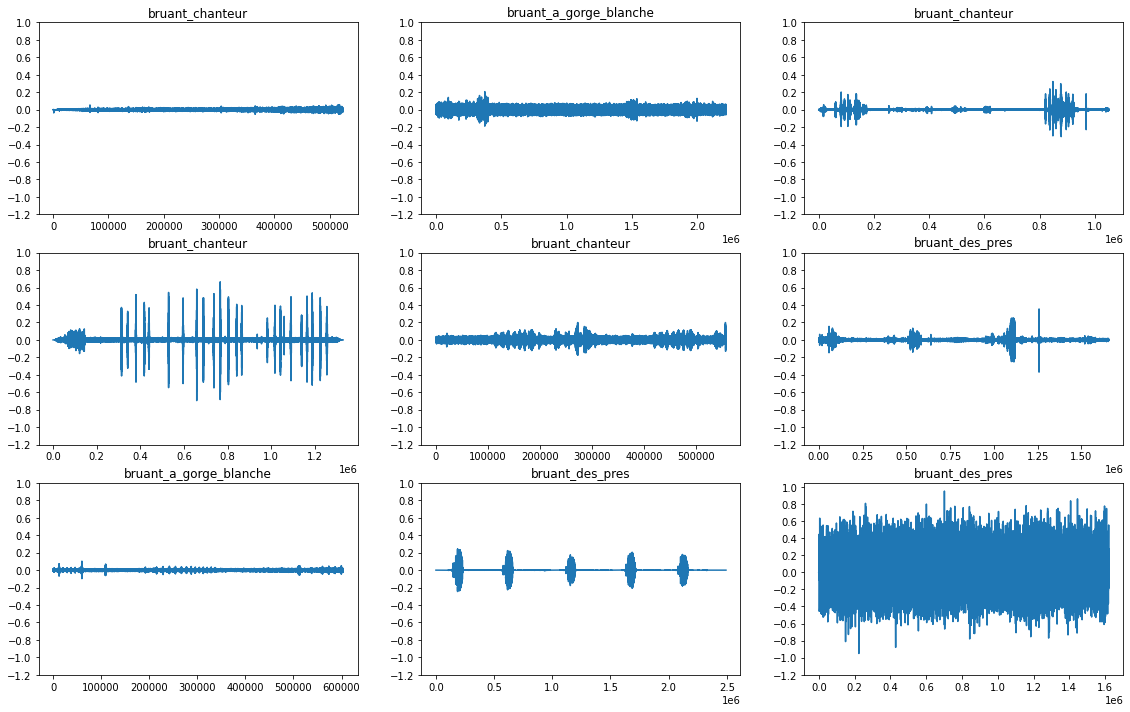

In [27]:
rows = 3
cols = 3
n = rows * cols
fig, axes = plt.subplots(rows, cols, figsize=(1.62*12, 12))

for i, (audio, label) in enumerate(waveform_ds.take(n)):
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  ax.plot(audio.numpy())
  ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
  label = label.numpy().decode('utf-8')
  ax.set_title(label)

plt.show()

## Convert waveforms to spectrograms

The waveforms in the dataset are represented in the time domain. Next, you'll transform the waveforms from the time-domain signals into the time-frequency-domain signals by computing the <a href="https://en.wikipedia.org/wiki/Short-time_Fourier_transform" class="external">short-time Fourier transform (STFT)</a> to convert the waveforms to as <a href="https://en.wikipedia.org/wiki/Spectrogram" clas="external">spectrograms</a>, which show frequency changes over time and can be represented as 2D images. You will feed the spectrogram images into your neural network to train the model.

A Fourier transform (`tf.signal.fft`) converts a signal to its component frequencies, but loses all time information. In comparison, STFT (`tf.signal.stft`) splits the signal into windows of time and runs a Fourier transform on each window, preserving some time information, and returning a 2D tensor that you can run standard convolutions on.

Create a utility function for converting waveforms to spectrograms:

- The waveforms need to be of the same length, so that when you convert them to spectrograms, the results have similar dimensions. This can be done by simply zero-padding the audio clips that are shorter than one second (using `tf.zeros`).
- When calling `tf.signal.stft`, choose the `frame_length` and `frame_step` parameters such that the generated spectrogram "image" is almost square. For more information on the STFT parameters choice, refer to <a href="https://www.coursera.org/lecture/audio-signal-processing/stft-2-tjEQe" class="external">this Coursera video</a> on audio signal processing and STFT.
- The STFT produces an array of complex numbers representing magnitude and phase. However, in this tutorial you'll only use the magnitude, which you can derive by applying `tf.abs` on the output of `tf.signal.stft`.

In [28]:
def get_spectrogram(waveform):
  # Zero-padding for an audio waveform with less than 16,000 samples.
  input_len = 41000
  waveform = waveform[:input_len]
  zero_padding = tf.zeros(
      [41000] - tf.shape(waveform),
      dtype=tf.float32)
  # Cast the waveform tensors' dtype to float32.
  waveform = tf.cast(waveform, dtype=tf.float32)
  # Concatenate the waveform with `zero_padding`, which ensures all audio
  # clips are of the same length.
  equal_length = tf.concat([waveform, zero_padding], 0)
  # Convert the waveform to a spectrogram via a STFT.
  spectrogram = tf.signal.stft(
      equal_length, frame_length=255, frame_step=128)
  # Obtain the magnitude of the STFT.
  spectrogram = tf.abs(spectrogram)
  # Add a `channels` dimension, so that the spectrogram can be used
  # as image-like input data with convolution layers (which expect
  # shape (`batch_size`, `height`, `width`, `channels`).
  spectrogram = spectrogram[..., tf.newaxis]
  return spectrogram

Next, start exploring the data. Print the shapes of one example's tensorized waveform and the corresponding spectrogram, and play the original audio:

In [29]:
for waveform, label in waveform_ds.take(1):
  label = label.numpy().decode('utf-8')
  spectrogram = get_spectrogram(waveform)

print('Label:', label)
print('Waveform shape:', waveform.shape)
print('Spectrogram shape:', spectrogram.shape)
print('Audio playback')
display.display(display.Audio(waveform, rate=41000))

Label: bruant_chanteur
Waveform shape: (524207,)
Spectrogram shape: (319, 129, 1)
Audio playback


Now, define a function for displaying a spectrogram:

In [30]:
def plot_spectrogram(spectrogram, ax):
  if len(spectrogram.shape) > 2:
    assert len(spectrogram.shape) == 3
    spectrogram = np.squeeze(spectrogram, axis=-1)
  # Convert the frequencies to log scale and transpose, so that the time is
  # represented on the x-axis (columns).
  # Add an epsilon to avoid taking a log of zero.
  log_spec = np.log(spectrogram.T + np.finfo(float).eps)
  height = log_spec.shape[0]
  width = log_spec.shape[1]
  X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
  Y = range(height)
  ax.pcolormesh(X, Y, log_spec)

Plot the example's waveform over time and the corresponding spectrogram (frequencies over time):

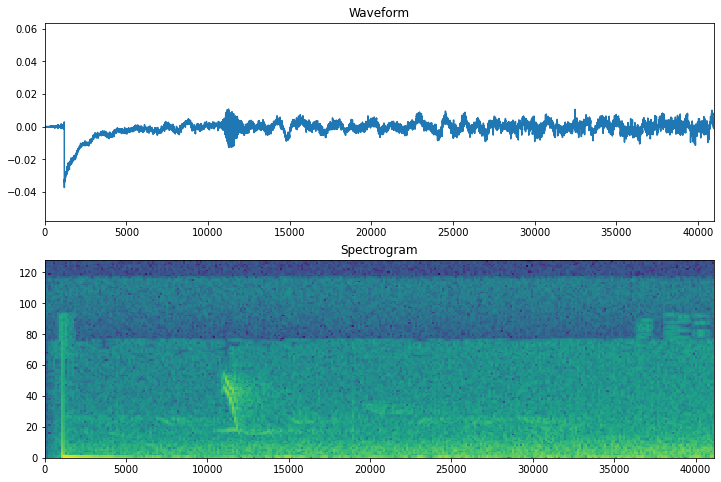

In [31]:
fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(waveform.shape[0])
axes[0].plot(timescale, waveform.numpy())
axes[0].set_title('Waveform')
axes[0].set_xlim([0, 41000])

plot_spectrogram(spectrogram.numpy(), axes[1])
axes[1].set_title('Spectrogram')
plt.show()

Now, define a function that transforms the waveform dataset into spectrograms and their corresponding labels as integer IDs:

In [34]:
def get_spectrogram_and_label_id(audio, label):
  spectrogram = get_spectrogram(audio)
  label_id = tf.argmax(label == chants)
  return spectrogram, label_id

Map `get_spectrogram_and_label_id` across the dataset's elements with `Dataset.map`:

In [35]:
spectrogram_ds = waveform_ds.map(
  map_func=get_spectrogram_and_label_id,
  num_parallel_calls=AUTOTUNE)

Examine the spectrograms for different examples of the dataset:

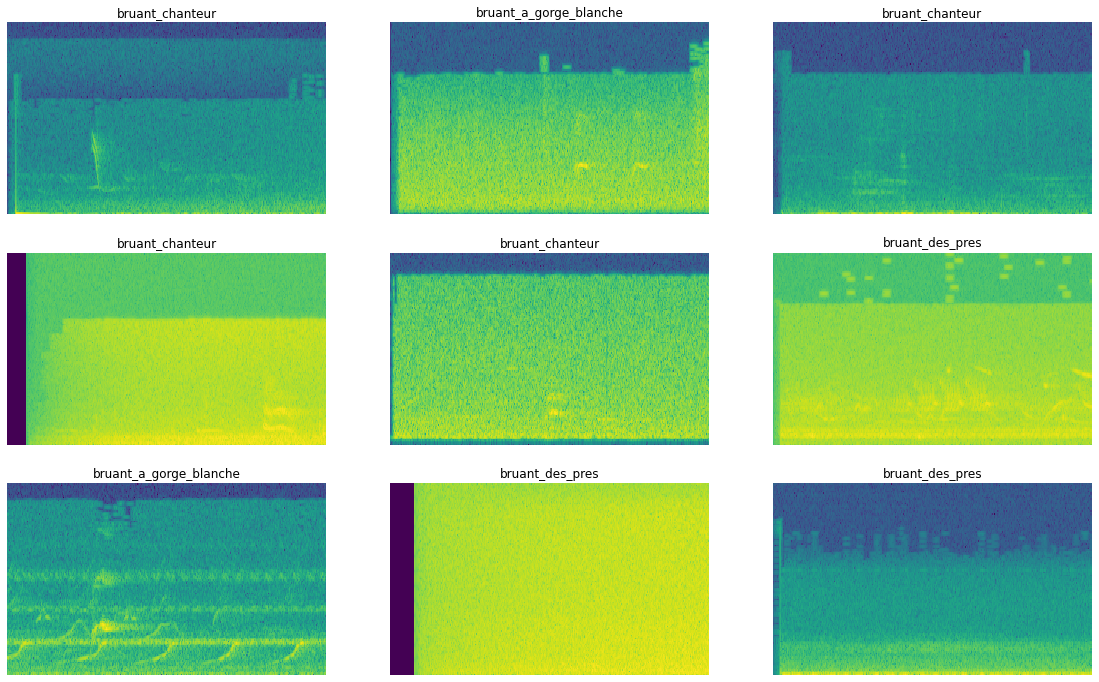

In [37]:
rows = 3
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(1.62*12, 12))

for i, (spectrogram, label_id) in enumerate(spectrogram_ds.take(n)):
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  plot_spectrogram(spectrogram.numpy(), ax)
  ax.set_title(chants[label_id.numpy()])
  ax.axis('off')

plt.show()

## Build and train the model

Repeat the training set preprocessing on the validation and test sets:

In [38]:
def preprocess_dataset(files):
  files_ds = tf.data.Dataset.from_tensor_slices(files)
  output_ds = files_ds.map(
      map_func=get_waveform_and_label,
      num_parallel_calls=AUTOTUNE)
  output_ds = output_ds.map(
      map_func=get_spectrogram_and_label_id,
      num_parallel_calls=AUTOTUNE)
  return output_ds

In [39]:
train_ds = spectrogram_ds
val_ds = preprocess_dataset(val_files)
test_ds = preprocess_dataset(test_files)

Batch the training and validation sets for model training:

In [40]:
batch_size = 64
train_ds = train_ds.batch(batch_size)
val_ds = val_ds.batch(batch_size)

Add `Dataset.cache` and `Dataset.prefetch` operations to reduce read latency while training the model:

In [41]:
train_ds = train_ds.cache().prefetch(AUTOTUNE)
val_ds = val_ds.cache().prefetch(AUTOTUNE)

For the model, you'll use a simple convolutional neural network (CNN), since you have transformed the audio files into spectrogram images.

Your `tf.keras.Sequential` model will use the following Keras preprocessing layers:

- `tf.keras.layers.Resizing`: to downsample the input to enable the model to train faster.
- `tf.keras.layers.Normalization`: to normalize each pixel in the image based on its mean and standard deviation.

For the `Normalization` layer, its `adapt` method would first need to be called on the training data in order to compute aggregate statistics (that is, the mean and the standard deviation).

In [42]:
for spectrogram, _ in spectrogram_ds.take(1):
  input_shape = spectrogram.shape
print('Input shape:', input_shape)
num_labels = len(chants)

# Instantiate the `tf.keras.layers.Normalization` layer.
norm_layer = layers.Normalization()
# Fit the state of the layer to the spectrograms
# with `Normalization.adapt`.
norm_layer.adapt(data=spectrogram_ds.map(map_func=lambda spec, label: spec))

model = models.Sequential([
    layers.Input(shape=input_shape),
    # Downsample the input.
    layers.Resizing(32, 32),
    # Normalize.
    norm_layer,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_labels),
])

model.summary()

Input shape: (319, 129, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 32, 32, 1)         0         
                                                                 
 normalization (Normalizatio  (None, 32, 32, 1)        3         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           

Configure the Keras model with the Adam optimizer and the cross-entropy loss:

In [43]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

Train the model over 20 epochs for demonstration purposes:

In [76]:
EPOCHS = 40
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    #callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=3),
)

Epoch 1/40
3/3 [==============================] - 0s 68ms/step - loss: 0.5620 - accuracy: 0.7556 - val_loss: 0.5070 - val_accuracy: 0.7778
Epoch 2/40
3/3 [==============================] - 0s 81ms/step - loss: 0.5211 - accuracy: 0.7944 - val_loss: 0.4890 - val_accuracy: 0.7778
Epoch 3/40
3/3 [==============================] - 0s 69ms/step - loss: 0.5112 - accuracy: 0.7722 - val_loss: 0.4455 - val_accuracy: 0.8333
Epoch 4/40
3/3 [==============================] - 0s 74ms/step - loss: 0.4896 - accuracy: 0.7778 - val_loss: 0.4336 - val_accuracy: 0.7778
Epoch 5/40
3/3 [==============================] - 0s 74ms/step - loss: 0.4701 - accuracy: 0.7889 - val_loss: 0.4285 - val_accuracy: 0.7778
Epoch 6/40
3/3 [==============================] - 0s 65ms/step - loss: 0.4803 - accuracy: 0.8000 - val_loss: 0.3845 - val_accuracy: 0.8333
Epoch 7/40
3/3 [==============================] - 0s 70ms/step - loss: 0.4838 - accuracy: 0.7778 - val_loss: 0.4163 - val_accuracy: 0.8333
Epoch 8/40
3/3 [===========

Let's plot the training and validation loss curves to check how your model has improved during training:

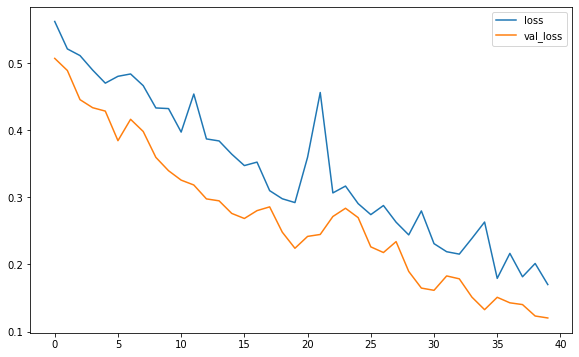

In [77]:
plt.figure(figsize=(1.62*6, 6))
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

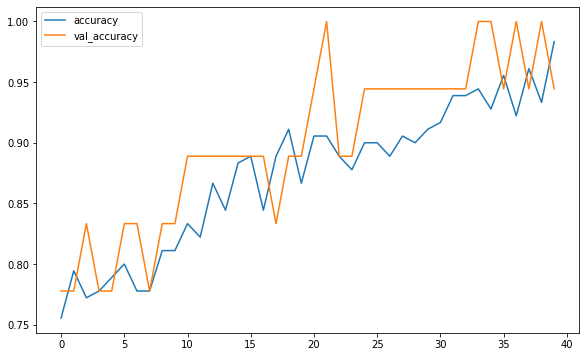

In [78]:
plt.figure(figsize=(1.62*6, 6))
metrics = history.history
plt.plot(history.epoch, metrics['accuracy'], metrics['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

## Evaluate the model performance

Run the model on the test set and check the model's performance:

In [79]:
test_audio = []
test_labels = []

for audio, label in test_ds:
  test_audio.append(audio.numpy())
  test_labels.append(label.numpy())

test_audio = np.array(test_audio)
test_labels = np.array(test_labels)

In [80]:
y_pred = np.argmax(model.predict(test_audio), axis=1)
y_true = test_labels

test_acc = sum(y_pred == y_true) / len(y_true)
print(f'Test set accuracy: {test_acc:.0%}')

Test set accuracy: 100%


### Display a confusion matrix

Use a <a href="https://developers.google.com/machine-learning/glossary#confusion-matrix" class="external">confusion matrix</a> to check how well the model did classifying each of the commands in the test set:


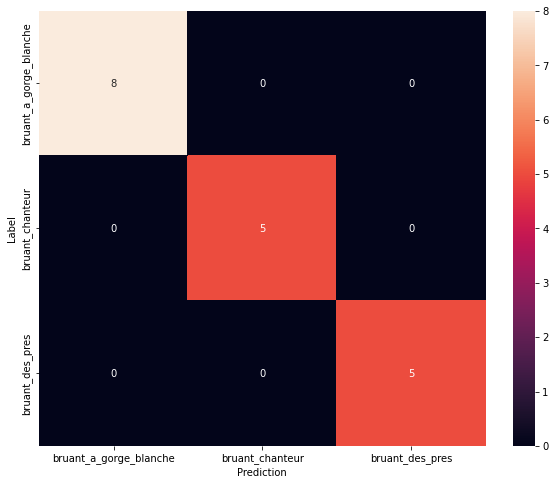

In [81]:
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=chants,
            yticklabels=chants,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

## Run inference on an audio file

Finally, verify the model's prediction output using an input audio file of someone saying "no". How well does your model perform?

In [82]:
# conversion .mp3 à .wav
!pip3 install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [116]:
# Téléchargement depuis https://xeno-canto.org/species/Zonotrichia-albicollis?pg=5
# Important! Vérifier que le ficher XC137568.wav n'est pas déjà dans le répertoire bruant_des_pres
!wget "https://xeno-canto.org/294259/download" -O "294259-bruant_a_gorge_blanche.mp3"
chemin_fichier_mp3 = "294259-bruant_a_gorge_blanche.mp3"

--2022-06-05 08:37:52--  https://xeno-canto.org/294259/download
Resolving xeno-canto.org (xeno-canto.org)... 54.246.0.204
Connecting to xeno-canto.org (xeno-canto.org)|54.246.0.204|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: //xeno-canto.org/sounds/uploaded/WOPIRNCCSX/XC294259-Tewkesbury-2015-07-25-09h50%20LS115580.mp3 [following]
--2022-06-05 08:37:53--  https://xeno-canto.org/sounds/uploaded/WOPIRNCCSX/XC294259-Tewkesbury-2015-07-25-09h50%20LS115580.mp3
Reusing existing connection to xeno-canto.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 886232 (865K) [audio/mpeg]
Saving to: ‘294259-bruant_a_gorge_blanche.mp3’

294259-bruant_a_gor 100%[===================>] 865.46K   426KB/s    in 2.0s    

2022-06-05 08:37:55 (426 KB/s) - ‘294259-bruant_a_gorge_blanche.mp3’ saved [886232/886232]



In [1]:
!wget "https://xeno-canto.org/331563/download" -O "331563-bruant_chanteur.mp3"
chemin_fichier_mp3 = "331563-bruant_chanteur.mp3"

--2022-06-05 18:56:25--  https://xeno-canto.org/331563/download
Resolving xeno-canto.org (xeno-canto.org)... 54.246.0.204
Connecting to xeno-canto.org (xeno-canto.org)|54.246.0.204|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: //xeno-canto.org/sounds/uploaded/WOPIRNCCSX/XC331563-Godmanchester-2016-06-19-06h10%20LS115882.mp3 [following]
--2022-06-05 18:56:26--  https://xeno-canto.org/sounds/uploaded/WOPIRNCCSX/XC331563-Godmanchester-2016-06-19-06h10%20LS115882.mp3
Reusing existing connection to xeno-canto.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 926352 (905K) [audio/mpeg]
Saving to: ‘331563-bruant_chanteur.mp3’

331563-bruant_chant 100%[===================>] 904.64K  --.-KB/s    in 0.1s    

2022-06-05 18:56:26 (7.34 MB/s) - ‘331563-bruant_chanteur.mp3’ saved [926352/926352]



In [104]:
!wget "https://xeno-canto.org/550411/download" -O "550411-bruant_des_pres.mp3"
chemin_fichier_mp3 = "550411-bruant_des_pres.mp3"

--2022-06-05 08:26:03--  https://xeno-canto.org/550411/download
Resolving xeno-canto.org (xeno-canto.org)... 54.246.0.204
Connecting to xeno-canto.org (xeno-canto.org)|54.246.0.204|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: //xeno-canto.org/sounds/uploaded/WOPIRNCCSX/XC550411-Cap-Saint-Ignace-2019-05-25-08h01%20LS117037.mp3 [following]
--2022-06-05 08:26:03--  https://xeno-canto.org/sounds/uploaded/WOPIRNCCSX/XC550411-Cap-Saint-Ignace-2019-05-25-08h01%20LS117037.mp3
Reusing existing connection to xeno-canto.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 706906 (690K) [audio/mpeg]
Saving to: ‘550411-bruant_des_pres.mp3’

550411-bruant_des_p 100%[===================>] 690.34K   419KB/s    in 1.6s    

2022-06-05 08:26:05 (419 KB/s) - ‘550411-bruant_des_pres.mp3’ saved [706906/706906]



In [117]:
import os
from os import path
from pydub import AudioSegment

fichier_mp3 = AudioSegment.from_mp3(chemin_fichier_mp3)
chemin_fichier_wav = "data/sons_oiseaux/bruant_a_gorge_blanche/Fichier_TEST"
fichier_mp3.export(chemin_fichier_wav,format="wav")

<_io.BufferedRandom name='data/sons_oiseaux/bruant_a_gorge_blanche/Fichier_TEST'>

In [101]:
import os
from os import path
from pydub import AudioSegment

fichier_mp3 = AudioSegment.from_mp3(chemin_fichier_mp3)
chemin_fichier_wav = "data/sons_oiseaux/bruant_chanteur/Fichier_TEST"
fichier_mp3.export(chemin_fichier_wav,format="wav")

<_io.BufferedRandom name='data/sons_oiseaux/bruant_chanteur/Fichier_TEST'>

In [105]:
import os
from os import path
from pydub import AudioSegment

fichier_mp3 = AudioSegment.from_mp3(chemin_fichier_mp3)
chemin_fichier_wav = "data/sons_oiseaux/bruant_des_pres/Fichier_TEST"
fichier_mp3.export(chemin_fichier_wav,format="wav")

<_io.BufferedRandom name='data/sons_oiseaux/bruant_des_pres/Fichier_TEST'>

As the output suggests, your model should have recognized the audio command as "no".

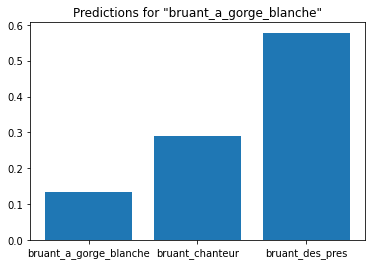

In [118]:
sample_file = chemin_fichier_wav

sample_ds = preprocess_dataset([str(sample_file)])

for spectrogram, label in sample_ds.batch(1):
  prediction = model(spectrogram)
  plt.bar(chants, tf.nn.softmax(prediction[0]))
  plt.title(f'Predictions for "{chants[label[0]]}"')
  plt.show()

In [119]:
prediction[0]

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.84837383, -0.06985388,  0.62121075], dtype=float32)>